# SEIRS+ Deterministic Model Demo

**This notebook provides a demonstration of the core functionality of the SEIRS+ Graph Model and offers a sandbox for easily changing simulation parameters and scenarios.** 
For a more thorough walkthrough of the model and use of this package, refer to the README and tutorial notebook.

### Installing and Importing the model code
All of the code needed to run the model is imported from the ```models``` module of this package.

#### Install the package using ```pip```
The package can be installed on your machine by entering this in the command line:

```sudo pip install seirsplus```

Then, the ```models``` module can be imported into your scripts as shown here:

In [1]:
from seirsplus.models import *
import networkx

#### *Alternatively, manually copy the code to your machine*
*You can use the model code without installing a package by copying the ```models.py``` module file to a directory on your machine. In this case, the easiest way to use the module is to place your scripts in the same directory as the module, and import the module as shown here:*
```python
from models import *
```

### Initializing the model parameters
All model parameter values are set in the call to the ```SEIRSModel``` constructor. The basic SEIR parameters ```beta```, ```sigma```, ```gamma```, and ```initN``` are the only required arguments. All other arguments represent parameters for optional extended model dynamics; these optional parameters take default values that turn off their corresponding dynamics when not provided in the constructor. For clarity and ease of customization in this notebook, all available model parameters are listed below. 

For more information on parameter meanings, see the README.

*The parameter values shown correspond to rough estimates of parameter values for the COVID-19 epidemic.*

In [2]:
model = SEIRSModel(initN   =1000000,
                   beta    =0.147, 
                   sigma   =1/5.2, 
                   gamma   =1/12.39, 
                   mu_I    =0.0004,
                   mu_0    =0, 
                   nu      =0, 
                   xi      =0,
                   beta_D  =0.147, 
                   sigma_D =1/5.2, 
                   gamma_D =1/12.39, 
                   mu_D    =0.0004,
                   theta_E =0, 
                   theta_I =0, 
                   psi_E   =1.0, 
                   psi_I   =1.0,
                   initI   =10000, 
                   initE   =0, 
                   initD_E =0, 
                   initD_I =0, 
                   initR   =0, 
                   initF   =0)

### Checkpoints
Model parameters can be easily changed during a simulation run using checkpoints. A dictionary holds a list of checkpoint times (```checkpoints['t']```) and lists of new values to assign to various model parameters at each checkpoint time. Any model parameter listed in the model constrcutor can be updated in this way. Only model parameters that are included in the checkpoints dictionary have their values updated at the checkpoint times, all other parameters keep their pre-existing values.

*The checkpoints shown here correspond to starting social distancing (transmission rate ```beta``` reduced) and testing at time ```t=20``` (testing rates ```theta_E``` and ```theta_I``` are set to non-zero values) and then stopping social distancing at time ```t=100``` (```beta``` returned to its "normal" value; testing params remain non-zero).*

In [3]:
checkpoints = {'t':       [100, 250], 
               'beta':    [0.147, 0.147], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02]
              }

### Running the simulation

In [4]:
model.run(T=300, checkpoints=checkpoints)

[Checkpoint: Updating parameters]
t = 99.90
[Checkpoint: Updating parameters]
t = 249.90


True

### Visualizing the results
The ```SEIRSNetworkModel``` class has a ```plot()``` convenience function for plotting simulation results on a matplotlib axis. This function generates a line plot of the frequency of each model state in the population by default, but there are many optional arguments that can be used to customize the plot.

The ```SEIRSNetworkModel``` class also has convenience functions for generating a full figure out of model simulation results (optionaly arguments can be provided to customize the plots generated by these functions). 
- ```figure_basic()``` calls the ```plot()``` function with default parameters to generate a line plot of the frequency of each state in the population.
- ```figure_infections()``` calls the ```plot()``` function with default parameters to generate a stacked area plot of the frequency of only the infection states ($E$, $I$, $D_E$, $D_I$) in the population.

For more information on the built-in plotting functions, see the README.

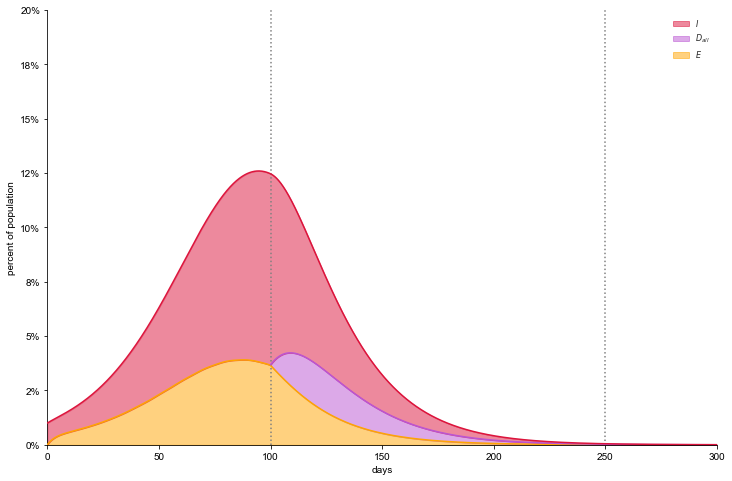

In [5]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.2)

#### Reference simulation visualization

We can also visualize the results of another simulation as a reference for comparison of our main simulation.

Here we simulate a model where no distancing or testing takes place, so that we can compare the effects of these interventions:

In [6]:
ref_model = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=10000, initN=1000000) 
ref_model.run(T=300)

AttributeError: SEIRSModel instance has no attribute 'mu_D'

Now we can visualize our main simulation together with this reference simulation by passing the model object of the reference simulation to the appropriate figure function argument (note: a second reference simulation could also be visualized by passing it to the ```dashed_reference_results``` argument):

In [ ]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model)